![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# The Bridge Problem

#### In this Callysto Notebook, we present a lesson that was first taught to Grade 8 students at Kitsilano Secondary School in Vancouver, and Grade 9 students at Collingwood School in West Vancouver.  

#### To use this Notebook, repeatedly click the "Run" button above, until you reach the end.  The teacher manual is embedded in this Notebook, marked in <font color='red'>red</font>.

##### Written by Richard Hoshino


#### <font color='red'>We begin by showing the following YouTube video, which presents the Bridge Problem.  To play the video, click the triangular "Play" button appearing in the middle of the video's screen.</font>

#### <font color='red'>Make sure you cut off the video at the 2:00 mark, just before the solution is revealed.</font>

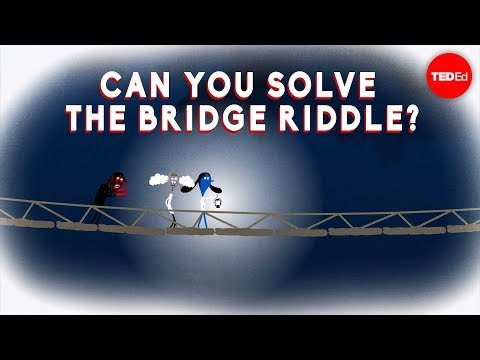

In [1]:
#Import Youtube Video
from IPython.display import YouTubeVideo
YouTubeVideo('7yDmGnA8Hw0')

#### <font color='red'>Divide students into groups of four, and have them stand and act out this problem, with a pen serving as the lantern.  Each student will take on one of the characters, with crossing times A=1, B=2, C=5, and D=10.</font>

#### <font color='red'>While some groups will get into this problem right away, some groups may be stuck and be unsure what is being asked.  At that point, have one group demonstrate the "intuitive" solution of sending the fastest person back and forth each time, which leads to a total time of 2+1+5+1+10 = 19 minutes.  This is illustrated in the animation below.</font>

## Any solution to this problem must involve five steps, as in the animation below:
### Step 1: Two people cross the bridge.
### Step 2: One person goes back.
### Step 3: Two people cross the bridge.
### Step 4: One person goes back.
### Step 5: Two people cross the bridge.

In [2]:
%%html
<iframe src="BridgeAnimation.mp4"></iframe>

#### <font color='red'>Give students enough time to wrestle with the problem, to see if they can get a solution with a total crossing time of 17 minutes.  Some groups may give up too soon, believing that the problem is impossible: especially because the sum of the four crossing times, 1+2+5+10, exceeds the target answer of 17. </font>

#### <font color='red'>Students will need to be reminded that when two people cross, they walk at the pace of the <i>slower</i> person, which is the <i>larger</i> number.  Run this activity until one (or more) teams gets the correct solution, which is to send 1 and 2 across first, have 1 come back, send 5 and 10 across (!), have 2 come back, and then send 1 and 2 across. This solution requires 2+1+10+2+2 = 17 minutes.</font>

#### <font color='red'>The big insight is that the optimal solution is found by combining the two slowest people, and sending them together. This turns out to be surprisingly faster than the intuitive approach of sending the fastest person back and forth each time. At this point, you may or may not wish to show the remaining part of the YouTube video, to confirm that the video's solution is identical to the students' solution.</font>


## We just discovered two possible "algorithms" to solve this problem: 
### Option 1: Always sending the fastest person
### Option 2: Combining the two slowest people

#### <font color='red'>As a class, analyze the two approaches where the crossing times are A, B, C, D, where A<B<C<D.  Have them conclude that "always sending the fastest person" has a total time of B+A+C+A+D, and "combining the two slowest people" has a total time of B+A+D+B+B.</font>
    
#### <font color='red'>We use the Python programming language to calculate a function called CalculateTime, that outputs the total crossing time given the four inputs A, B, C, D.  In a Grade 8 or 9 Math class, we recommend highlighting the two print statements at the end of this code block (and ignoring the rest), while it might be worthwhile to explore this code block with a Programming class, going through the code line by line, to see how the inputs are sorted before the print statements.</font>

In [3]:
def CalculateTime(A, B, C, D):
    t=[A,B,C,D]
    t.sort()
    A=t[0] 
    B=t[1] 
    C=t[2] 
    D=t[3]
    print('Sending Fastest Person solves the problem in', B+A+C+A+D, 'minutes')
    print('Combining Two Slowest solves the problem in', B+A+D+B+B, 'minutes')
    return

#### <font color='red'>Now have students pair up, and access this Callysto Notebook themselves, using a shared laptop.  Have them use the widget slider (see below) to see what happens when they toggle the values of A, B, C, D.  They can verify that the values A=1, B=2, C=5, D=10 results in a total crossing time of 19 minutes for the first method and 17 minutes for the second method.</font>
    
#### <font color='red'>The Python code below creates a "widget slider" using the above CalculateTime function, and instantly outputs the total crossing times for each of our two methods.  Once again, we recommend skipping over the details of the code, especially in a Grade 8 or 9 Math Class.</font>

## Let's compare our algorithms, and see which one is faster.
### Let's experiment by trying different input values for A, B, C, and D.

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
interact(CalculateTime,
A=widgets.IntSlider(min=1, max=20),
B=widgets.IntSlider(min=1, max=20),
C=widgets.IntSlider(min=1, max=20),
D=widgets.IntSlider(min=1, max=20))

interactive(children=(IntSlider(value=1, description='A', max=20, min=1), IntSlider(value=1, description='B', …

<function __main__.CalculateTime(A, B, C, D)>

#### <font color='red'>Now ask students to use the widgets to complete the following activity: find values of A, B, C, D, for which we get the SAME total crossing time for the two different methods.  For example, the choice A=1, B=3, C=5, D=7 returns a total crossing time of 17 minutes for both methods.  Remind the students that A<B<C<D, even though the code automatically sorts the four numbers if they are in the wrong order.</font>

#### <font color='red'>Have the students just focus on the widgets, to determine possible solutions <i>experimentally</i>, rather than <i>algebraically</i> by finding values for which B+A+C+A+D=B+A+D+B+B.  This part will come later.

#### <font color='red'>After a few minutes, ask each pair to come up to the front and write down the various solutions (A,B,C,D) for which the two methods return the same crossing time.  Hopefully the class will have generated at least 20 solutions, such as (1,3,5,7), (4,7,10,18), and (4,7,10,19).  Now ask them if they notice anything interesting.  They should notice that B always seems to be the average of A and C, and that the variable D is irrelevant.
    
#### <font color='red'>At this point, tell students that the two methods return the same total time precisely when B+A+C+A+D=B+A+D+B+B.  And then this motivates a natural context for teaching students how to simplify equations such as this, by subtracting like terms from both sides.  In this particular problem, we have three like terms on both sides (one B, one A, one D), and so the above equation simplifies to A+C=B+B, which implies that B is indeed the average of A and C, and that the variable D indeed is irrelevant.</font>

#### <font color='red'>We very much like teaching this lesson with Grade 8 and 9 students, before they learn how to simplify and solve equations, especially as this lesson motivates this key topic in the high school math curriculum.</font>


## Two Challenge Questions
### For which values of (A,B,C,D) do the above solutions result in the same total time?
### How many different ways can the four people cross the bridge?  (Hint: the answer is more than 100!)

#### <font color='red'>For more advanced classes (say a Grade 11 or 12 class), the above problem will be too easy, and students will quickly be able to show that B=(A+C)/2 using some algebra.  So the more interesting problem for these students is the following: how many different ways can the four people cross the bridge?</font>

#### <font color='red'>Have them investigate this in small groups.  The solution is below.  </font>

#### <font color='red'>The first move, of sending two people across the bridge, can be done in 6 ways (AB, AC, AD, BC, BD, CD), and then the second move can be done in 2 ways (since either individual can return).  Since there are now three people on the left side of the bridge, the third move can be made in 3 ways (since exactly one of the three must stay behind). The fourth move can be made in 3 ways (since there are now three people on the right side of the bridge, and exactly one of them must return).  Finally, the fifth move can only be made in 1 way, since the remaining two people must walk across the bridge together.  Thus, the correct answer is 6x2x3x3x1 = 108.</font>
    
#### <font color='red'>For your strongest students, here is one final challenge problem: </font>

#### <font color='red'>Let A, B, C, D be any four positive numbers, representing the crossing times of the four people.  Among all 108 ways that the four people can all get to the other side, let M be the minimum total time.  Prove that this minimum time <i>must</i> be obtained from one of the two solutions described above, i.e., either M=B+A+C+A+D or M=B+A+D+B+B.  (In other words, you are to prove that only 2 of the 108 ways can be optimal, for all A,B,C,D.)</font>
   
#### <font color='red'>I will purposely not post the solution to that challenge problem here.  However, your students are encouraged to write out their solution, scan it as a PDF, and then e-mail it to me (richard.hoshino@gmail.com).  I would be happy to write to the student and provide feedback on their solution.</font>
    
    
    
    
    

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)